In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Let's First Visualise the data

In [54]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

#Converting X,Y to numpy arrays
X = X.values
Y = Y.values

print(X.shape,Y.shape)

(3750, 1) (3750, 1)


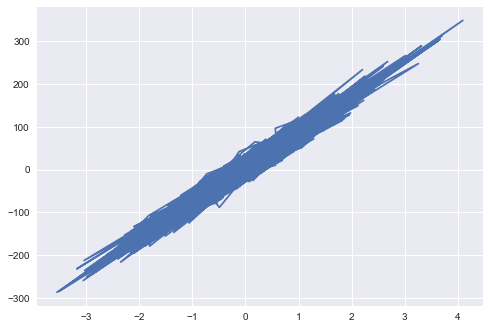

In [55]:
plt.plot(X,Y)
plt.show()

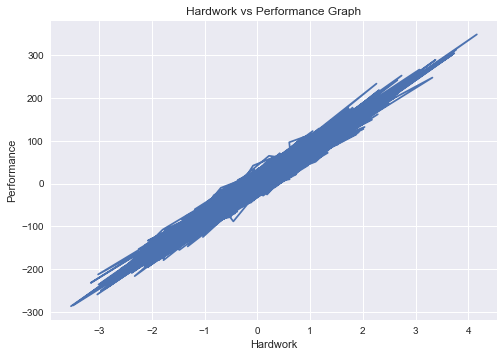

In [56]:
#Before using the data in ML, we should always bring it in standard normal form
#as then answers will be more accurate and standard
u = X.mean()
standardDeviation = X.std()
X = (X-u)/standardDeviation


plt.style.use('seaborn')
plt.plot(X,Y)
plt.title('Hardwork vs Performance Graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show() #Since the above data was almost normalized, Therefore not much 
#changes can be seen in the graph

## Linear Regression Algo

In [57]:
#This function will predict the value of the output based on the input
def hypothesis(x,theta):
    #Here y_ mean y hat i.e predicted value of the input x
    y_ = theta[0] + x*theta[1]
    return y_

In [58]:
#This function will find the gradient (grad[0],grad[1]) i.e gradient for both the theta 1 and theta 2
def gradient(X,Y,theta):
    gradient_zero = 0
    gradient_one = 0
    for i in range(X.shape[0]):
        gradient_zero = gradient_zero + hypothesis(X[i],theta) - Y[i]
        gradient_one = gradient_one + (hypothesis(X[i],theta) - Y[i])*X[i]
        
    grad = np.array([gradient_zero,gradient_one])
    return grad/X.shape[0]   
    

In [59]:
#Here this func. will apply gradientDescent update rule on our training data to find best Theta = (Theta0,Theta1)
#which best suits are line --
def gadientDescent(X,Y,maxSteps = 1000,learning_rate = 0.1):
    
    #Step1 -  Initialising the Theta with some random values 
    theta = np.zeros((2,))
    for i in range(maxSteps):
        #This function will get us the gradient for both theta0,theta1 at the current step
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta



[ 0.68386897 79.90573694]


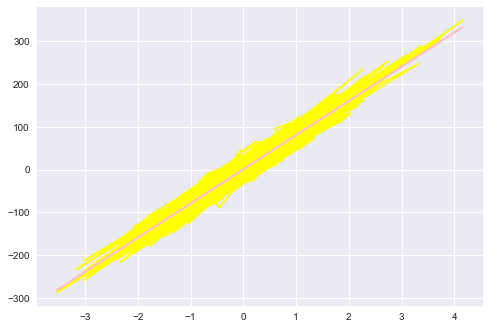

In [60]:
#First let's find the value of theta for our current data
myTheta = gadientDescent(X,Y)
print(myTheta)

#Now let's find the predicted values of y through this current line
predictedYs = hypothesis(X,myTheta)
plt.plot(X,Y,color = 'yellow')
plt.plot(X,predictedYs,color = 'pink')
plt.show()

#Clearly this line predicts the Y in best possible way.

In [61]:
#Note - Above algo is correct. But i am making some more changes(To show how error changes with change in theta) 
#in that algo to analyse it correctly. 

In [62]:
#After finding the value of theta = (theta0,theta1). We will be Obviously finding the abosulte squared error(or J(theta))
def findingMeanSquaredError(X,Y,theta):
    total_error = 0
    size = X.shape[0]
    for i in range(size):
        total_error = total_error + (hypothesis(X[i],theta) - Y[i])**2
        
    return total_error/size  

In [68]:
def gradientDescent2(X,Y,maxSteps = 1000,learning_rate = 0.1):
    
    
    error_list = []
    theta_list = []
    theta = np.zeros((2,))
    
    
    for i in range(maxSteps):
        current_error = findingMeanSquaredError(X,Y,theta)
        error_list.append(current_error)
        print(theta,end =' ')
        
        
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append((theta[0],theta[1]))
        
    return (theta,error_list,theta_list)

In [69]:
l = gradientDescent2(X,Y)

[0. 0.] [0.0683869  7.99057369] [ 0.1299351  15.18209002] [ 0.18532849 21.65445471] [ 0.23518254 27.47958293] [ 0.28005118 32.72219834] [ 0.32043296 37.4405522 ] [ 0.35677656 41.68707067] [ 0.3894858 45.5089373] [ 0.41892412 48.94861726] [ 0.4454186  52.04432923] [ 0.46926364 54.83047   ] [ 0.49072417 57.3379967 ] [ 0.51003865 59.59477072] [ 0.52742168 61.62586734] [ 0.54306641 63.4538543 ] [ 0.55714667 65.09904257] [ 0.5698189 66.579712 ] [ 0.5812239 67.9123145] [ 0.59148841 69.11165674] [ 0.60072647 70.19106476] [ 0.60904072 71.16253198] [ 0.61652354 72.03685248] [ 0.62325808 72.82374092] [ 0.62931917 73.53194053] [ 0.63477415 74.16932017] [ 0.63968363 74.74296184] [ 0.64410217 75.25923935] [ 0.64807885 75.72388911] [ 0.65165786 76.1420739 ] [ 0.65487897 76.5184402 ] [ 0.65777797 76.85716987] [ 0.66038707 77.16202658] [ 0.66273526 77.43639762] [ 0.66484863 77.68333155] [ 0.66675066 77.90557209] [ 0.66846249 78.10558857] [ 0.67000314 78.28560341] [ 0.67138972 78.44761676] [ 0.67263765

[ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897

[ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897

[ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897 79.90573694] [ 0.68386897

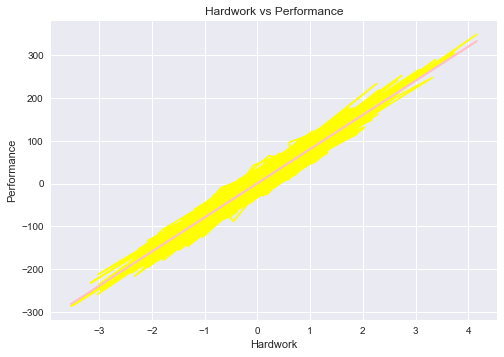

In [72]:
myTheta,error_list,theta_list = l
predictedYs = hypothesis(X,myTheta)
plt.plot(X,Y,color = 'yellow')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork vs Performance')
plt.plot(X,predictedYs,color = 'pink')
plt.show()

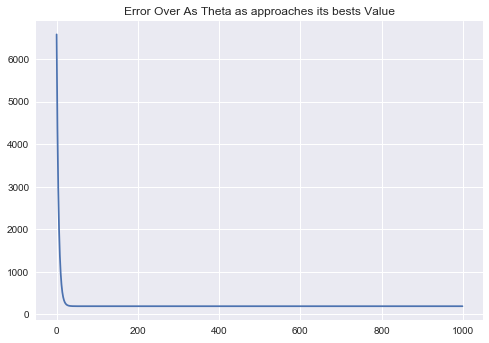

In [71]:
#We can clearly see as we were moving towards the minima, error was continuously reducing
plt.plot(error_list)
plt.title('Error Over As Theta as approaches its bests Value')
plt.show()

In [75]:
#Now let's predict the results of test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,myTheta)
print(y_test.shape)

#Now first convert the numpy array into a DataFrame Object
myDataFrame = pd.DataFrame(y_test,columns = ['y'])

myDataFrame.head()

(1250, 1)


,y
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170


In [78]:
#Now let's write it directly into a csv file
myDataFrame.to_csv('challenge_answer.csv',index = False)

### Computing Score